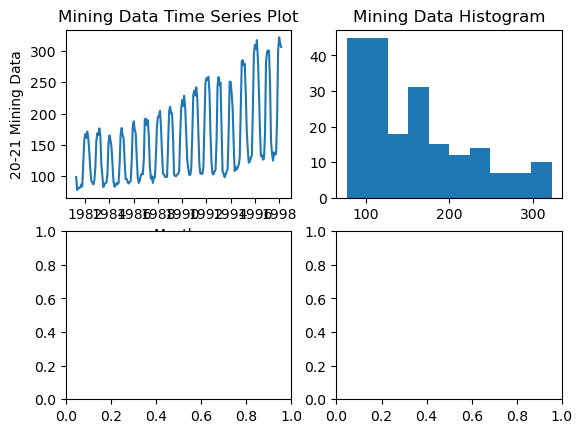

In [1]:
import pandas as pd
import numpy as np 
import os
import calendar
import matplotlib.pyplot as plt
import networkx as nx
from pandas.plotting import scatter_matrix,parallel_coordinates
import seaborn as sns
from sklearn import preprocessing


Mining = pd.read_csv('Timeseries Data.csv')
Mining1 = Mining.iloc[1:,0:2]
Mining1.Months = pd.to_datetime(Mining1.Months,format="%b'%y")
Mining_s = pd.Series(Mining1['20-21'].values,index=Mining1.Months)
figure, axis = plt.subplots(2,2)
axis[0,0].plot(Mining_s)
axis[0,0].set_title('Mining Data Time Series Plot')
axis[0,1].hist(Mining_s,bins=10)
axis[0,1].set_title('Mining Data Histogram')
axis[0,0].set_xlabel('Months')
axis[0,0].set_ylabel('20-21 Mining Data')
plt.show()



## git add Learning_Project.ipynb       
## git commit -m "heat map and box plot"
## git push origin main   

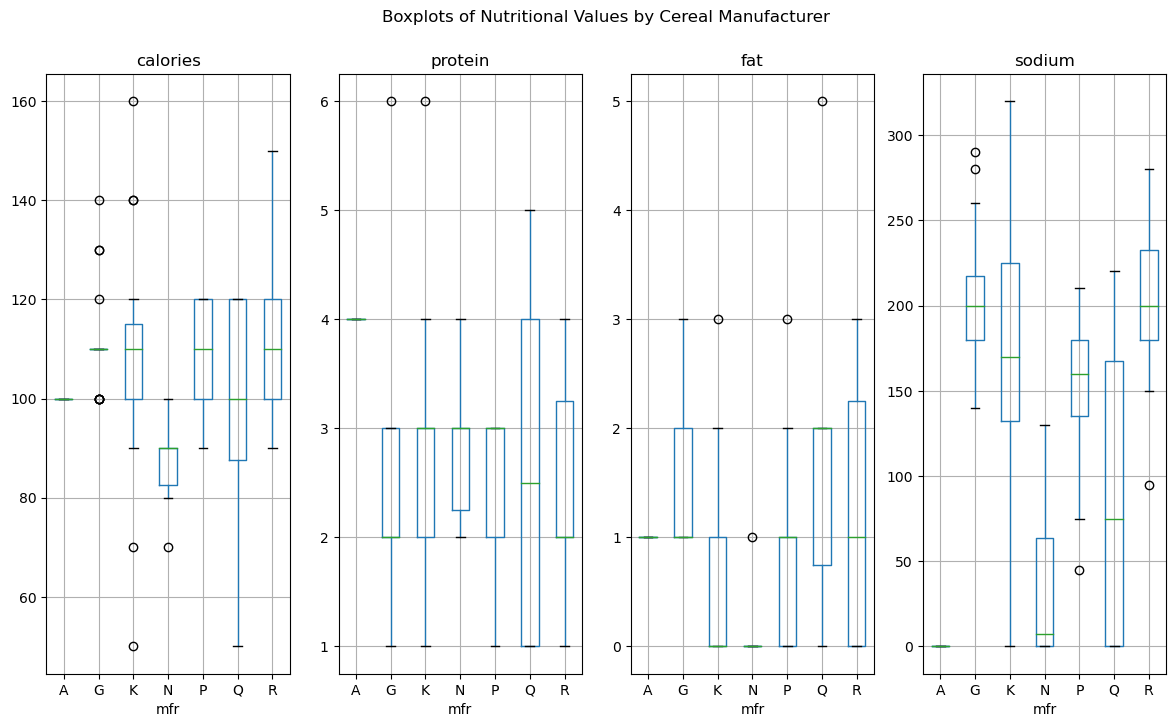

In [2]:
cereals = pd.read_csv('Cereals.csv')
cereals.columns = cereals.columns.str.replace(' ','_')  
fig, axes = plt.subplots(nrows=1,ncols=4,figsize=(14,8))

cereals.boxplot(column="calories",ax=axes[0],by='mfr')
cereals.boxplot(column="protein",ax=axes[1],by='mfr')
cereals.boxplot(column="fat",ax=axes[2],by='mfr')
cereals.boxplot(column="sodium",ax=axes[3],by='mfr')
plt.suptitle('Boxplots of Nutritional Values by Cereal Manufacturer')
plt.show()


<AxesSubplot:>

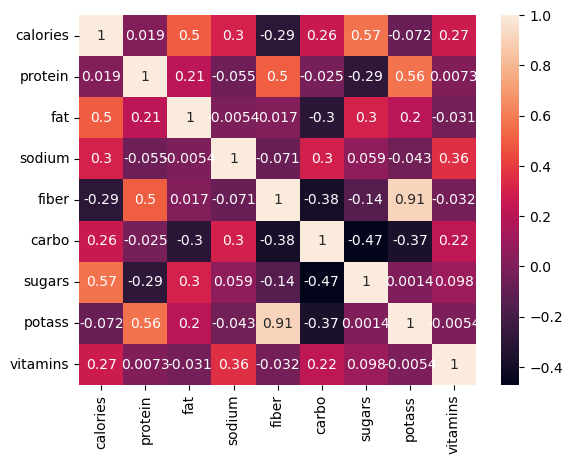

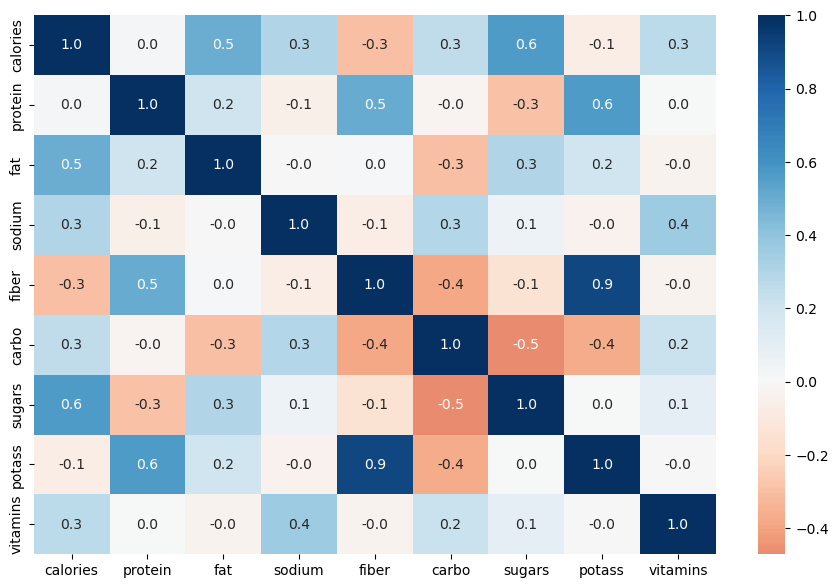

In [4]:
heat_map_table = cereals[['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins']]
corr=heat_map_table.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True)
fig,ax = plt.subplots()
fig.set_size_inches(11,7)
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True,fmt=".1f",cmap="RdBu",center=0,ax=ax)


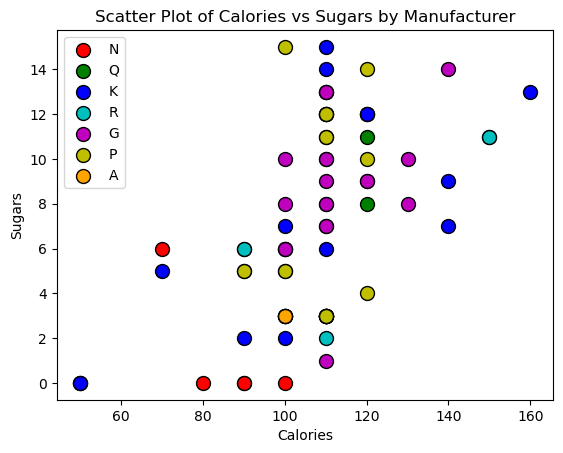

In [5]:
manufacturers = cereals['mfr'].unique()
colors = ['r','g','b','c','m','y','orange']
color_dict = dict(zip(manufacturers,colors))
for mfr in manufacturers:
    subset = cereals[cereals['mfr']==mfr]
    plt.scatter(subset['calories'],subset['sugars'],s=100,c=color_dict[mfr],edgecolors='k',label=mfr)
plt.xlabel('Calories')
plt.ylabel('Sugars')
plt.title('Scatter Plot of Calories vs Sugars by Manufacturer')
plt.legend()
plt.show()


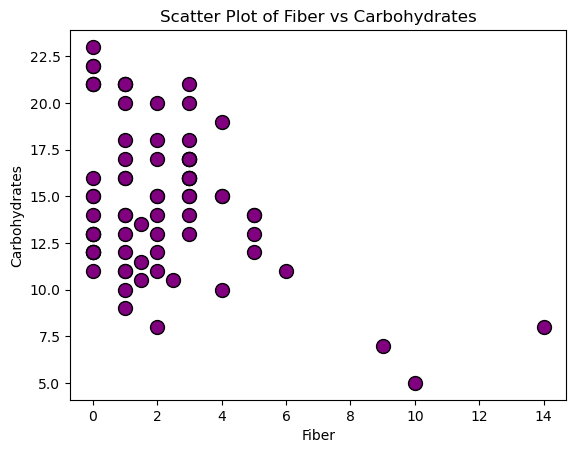

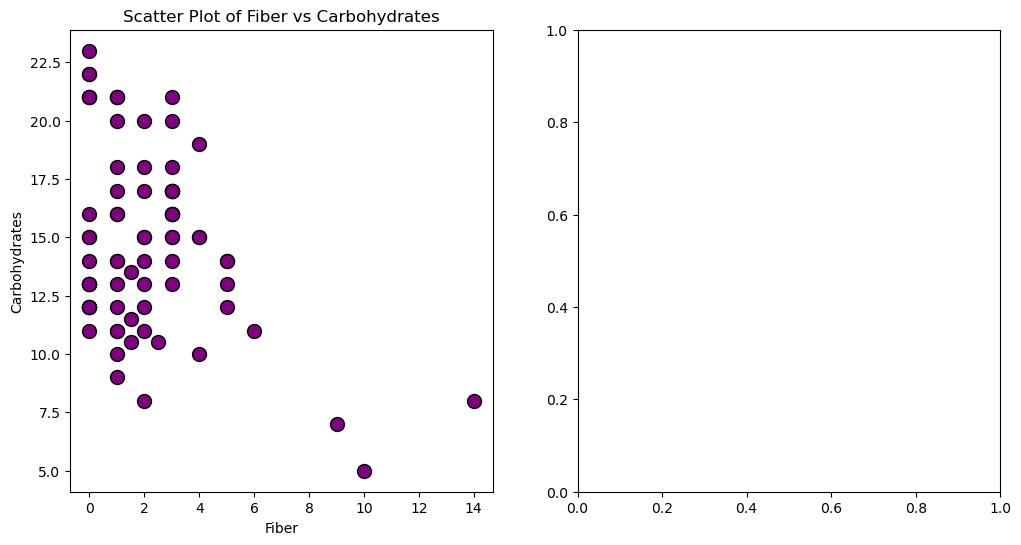

In [26]:
plt.scatter(cereals['fiber'],cereals['carbo'],s=100,c='purple',edgecolors='k')

plt.xlabel('Fiber')
plt.ylabel('Carbohydrates')
plt.title('Scatter Plot of Fiber vs Carbohydrates')
plt.show()

plt.rcParams['axes.formatter.min_exponent'] = 2

figure, axis = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
axis[0].scatter(cereals['fiber'],cereals['carbo'],s=100,c='purple',edgecolors='k')
axis[0].set_xlabel('Fiber')
axis[0].set_ylabel('Carbohydrates')
axis[0].set_title('Scatter Plot of Fiber vs Carbohydrates')
plt.show()

axis[1].scatter(cereals['fiber'],cereals['carbo'],s=100,c='orange',edgecolors='k')
axis[1].set_xlabel('Fiber (log scale)')
axis[1].set_ylabel('Carbohydrates (log scale)')
axis[1].set_title('Scatter Plot of Fiber vs Carbohydrates (Log-Log Scale)')
axis[1].set_xscale('log')
axis[1].set_yscale('log')   
plt.show()




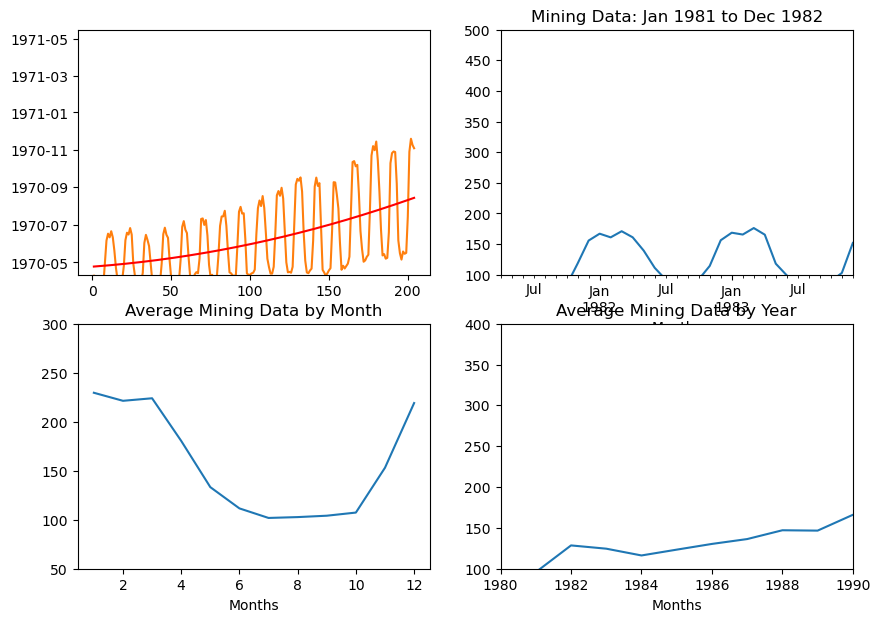

In [ ]:
##creating a quadratic fit for time series data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

ts1 = pd.read_csv('Timeseries Data.csv')
ts = ts1.iloc[1:,0:2]
ts.Months = pd.to_datetime(ts.Months,format="%b'%y")
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(10,7))

quadraticFit = np.poly1d(np.polyfit(range(len(ts)), ts['20-21'], 2))
ts_fit = pd.DataFrame({'Fitted Values':[quadraticFit(t) for t in range(len(ts))]})

ts_fit.index = ts.index
ax = ts.plot(ylim=[100,500],legend=False, ax=axes[0,0])
ts_fit.plot(ax=ax, color='red', legend=False)

#zoom 2 year data 
ts.set_index('Months',inplace=True)
Two_years_data = ts.loc['1981-01-01':'1983-12-01']
ax=Two_years_data.plot(ylim=[100,500],legend=False, title='Mining Data: Jan 1981 to Dec 1982', ax=axes[0,1])


#average by month

byMonth = ts.groupby(ts.index.month).mean()
ax = byMonth.plot(ylim=[50,300],legend=False, title='Average Mining Data by Month', ax=axes[1,0])  


#average by year
byYear = ts.groupby(ts.index.year).mean()
#10 year data 
ax = byYear.plot(ylim=[100,400],legend=False, title='Average Mining Data by Year', ax=axes[1,1],xlim=[1980, 1990])


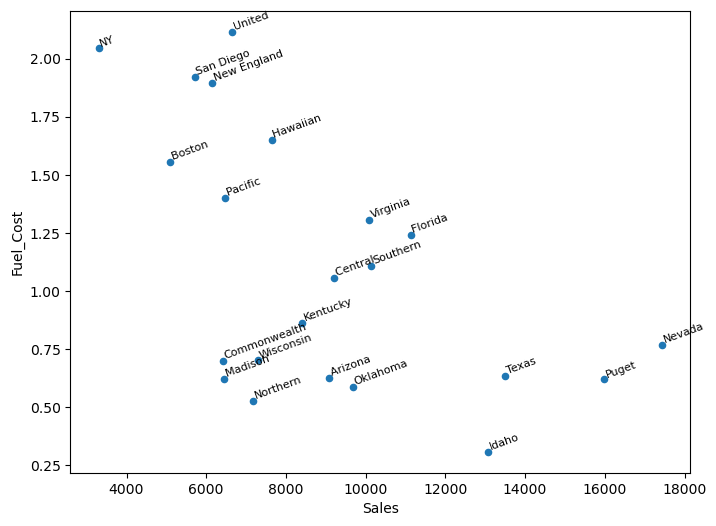

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

utilities_df = pd.read_csv('Utilities.csv')
ax=utilities_df.plot.scatter(x='Sales',y='Fuel_Cost',figsize=(8,6))


points=utilities_df[['Sales','Fuel_Cost','Company']]

#_= means variable output is not neeed so we use _ to ignore it

#applies a function row-wise (because  axis=1 ) on the DataFrame or Series  points .
#ls on the plot  ax  at coordinates unpacked from  x  

_=points.apply(lambda x: ax.text(*x,rotation=20,horizontalalignment='left', verticalalignment='bottom',fontsize=8),axis=1)


<class 'set'>
      Seller     Bidder  Weight  Bidder.Volume  Seller.Volume
0  332874919  718577508       2              3            547
1  594667804  399983466       5              6            183
2  663070601  655828811       1              4            274
3  309608641  599835541       3              8           3986
4  201729374  693022555       1              2           4681
[False, True, False, True, False, True, False, True, False, True, True, True, False, True, True, False, True, False, True, False, True, False, True, True, True, True, False, True, True, False, True, True, False, True, False, True, False, True, False, True, True, False, True, False, True, True, True, True, False, True, True, True, True, True, True, False, True, False, True, True, False, True, True, True, False, True, True, False, True, True, True, True, False, True, False, True, True, True, False, True, False, True, False, True, False, True, True, True, True, True, True, True, True, True, False, True, True, 

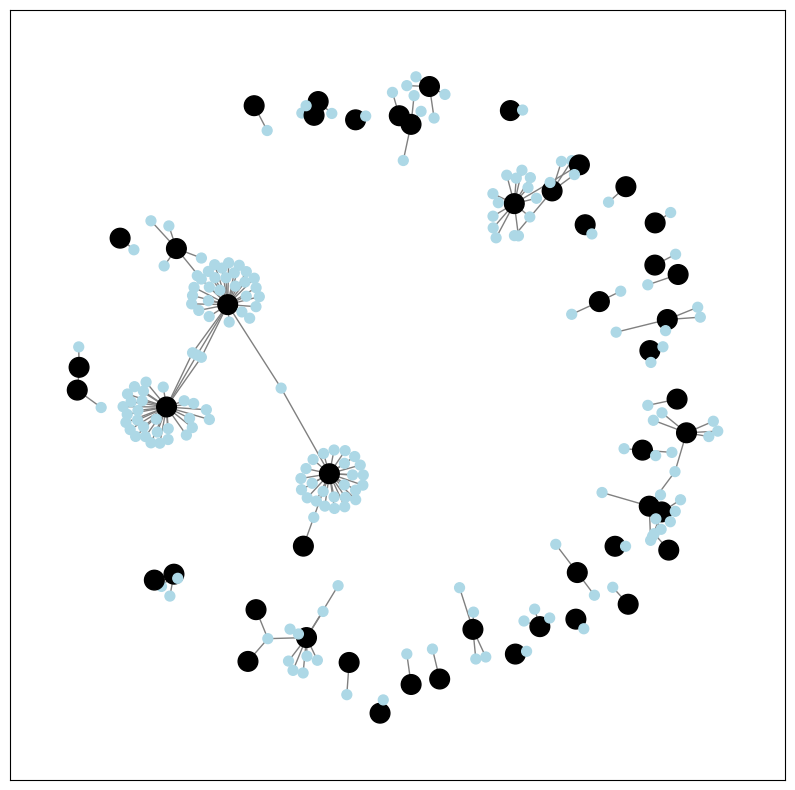

In [10]:
# netrork graph
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

ebay_df = pd.read_csv('eBayNetwork.csv')
G = nx.from_pandas_edgelist(ebay_df,source='Seller',target='Bidder')

print(type(set(ebay_df['Bidder'])))
print(ebay_df.head())
isBidder = [n in set(ebay_df['Bidder']) for n in G.nodes()]
print(isBidder)
pos=nx.spring_layout(G,k=0.13,iterations=60,scale=0.5)
plt.figure(figsize=(10,10))

nx.draw_networkx(G, pos=pos, with_labels=False,edge_color='gray',
                 node_color=['lightblue' if bidder else 'black' for bidder in isBidder] ,
                 node_size=[50 if bidder else 200 for bidder in isBidder])

In [ ]:
import squarify
import matplotlib.pyplot as plt
eBayTreemaap = pd.read_csv('eBayTreemap.csv')
grouped=[]

for category, df in eBayTreemaap.groupby(['Category']):
    grouped.append({
        'category': category,
        'negativeFeedback': negativeFeedback,
        'averageBid': df['High Bid'].mean(),
        'value': df['Value'].sum()
    })
byCategory = pd.DataFrame(grouped)

norm=matplotlib.colors.Normalize(vmin=byCategory['averageBid'].min(), vmax=byCategory['averageBid'].max())
